In [1]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs

ModuleNotFoundError: No module named 'mlxtend'

Text(0, 0.5, 'Feature 2')

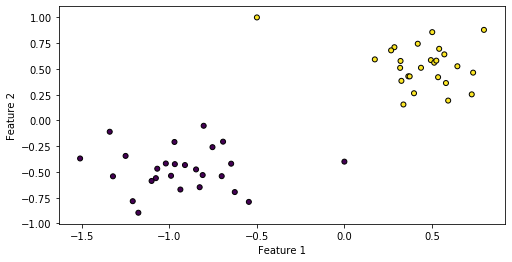

In [ ]:
X, y = make_blobs(random_state=0,
                  n_samples=50, 
                  n_features=2, 
                  cluster_std=0.2,
                  centers=[(-1.0, -0.5),(0.5, 0.5)])

X = np.vstack((X, [0.0,-0.4],[-0.5,1.0]))
y = np.hstack((y, 0,1))

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
model = LinearSVC(loss='hinge', C=1000000, random_state=0)
# モデルの訓練
model.fit(X, y)

LinearSVC(C=1000000, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [ ]:
# ロジスティック回帰モデルを作成
model2 = LogisticRegression(C=1.0, multi_class = 'ovr', max_iter=100, solver='liblinear',penalty='l2', random_state=0)

# モデルの訓練
model2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
# 決定境界用の変数X_pltを作成
X_plt = np.linspace(-1.5, 1, 100)[:, np.newaxis]

# SVCの決定境界の作成
w = model.coef_[0]
b = model.intercept_[0]
decision_boundary = -w[0]/w[1] * X_plt - b/w[1]

# SVCの決定境界の上下にマージン作成
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

# ロジスティック回帰の決定境界
w2 = model2.coef_[0]
b2 = model2.intercept_[0]
decision_boundary2 = -w2[0]/w2[1] * X_plt - b2/w2[1]

<function matplotlib.pyplot.show>

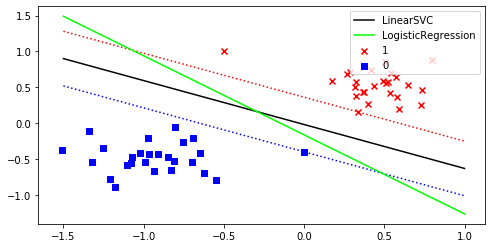

In [ ]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 決定境界、マージンのプロット
plt.plot(X_plt, decision_boundary, linestyle = "-",  color='black', label='LinearSVC')
plt.plot(X_plt, gutter_up, linestyle = ":", color='red')
plt.plot(X_plt, gutter_down, linestyle = ":",color='blue')
plt.plot(X_plt, decision_boundary2, linestyle = "-", color='lime', label='LogisticRegression')

# 訓練データの散布図
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='r', marker='x', label='1')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='b', marker='s', label='0')
plt.legend(loc='best')
plt.show

全データ数: 200
削減後のデータ数(サポートベクターのみ): 77


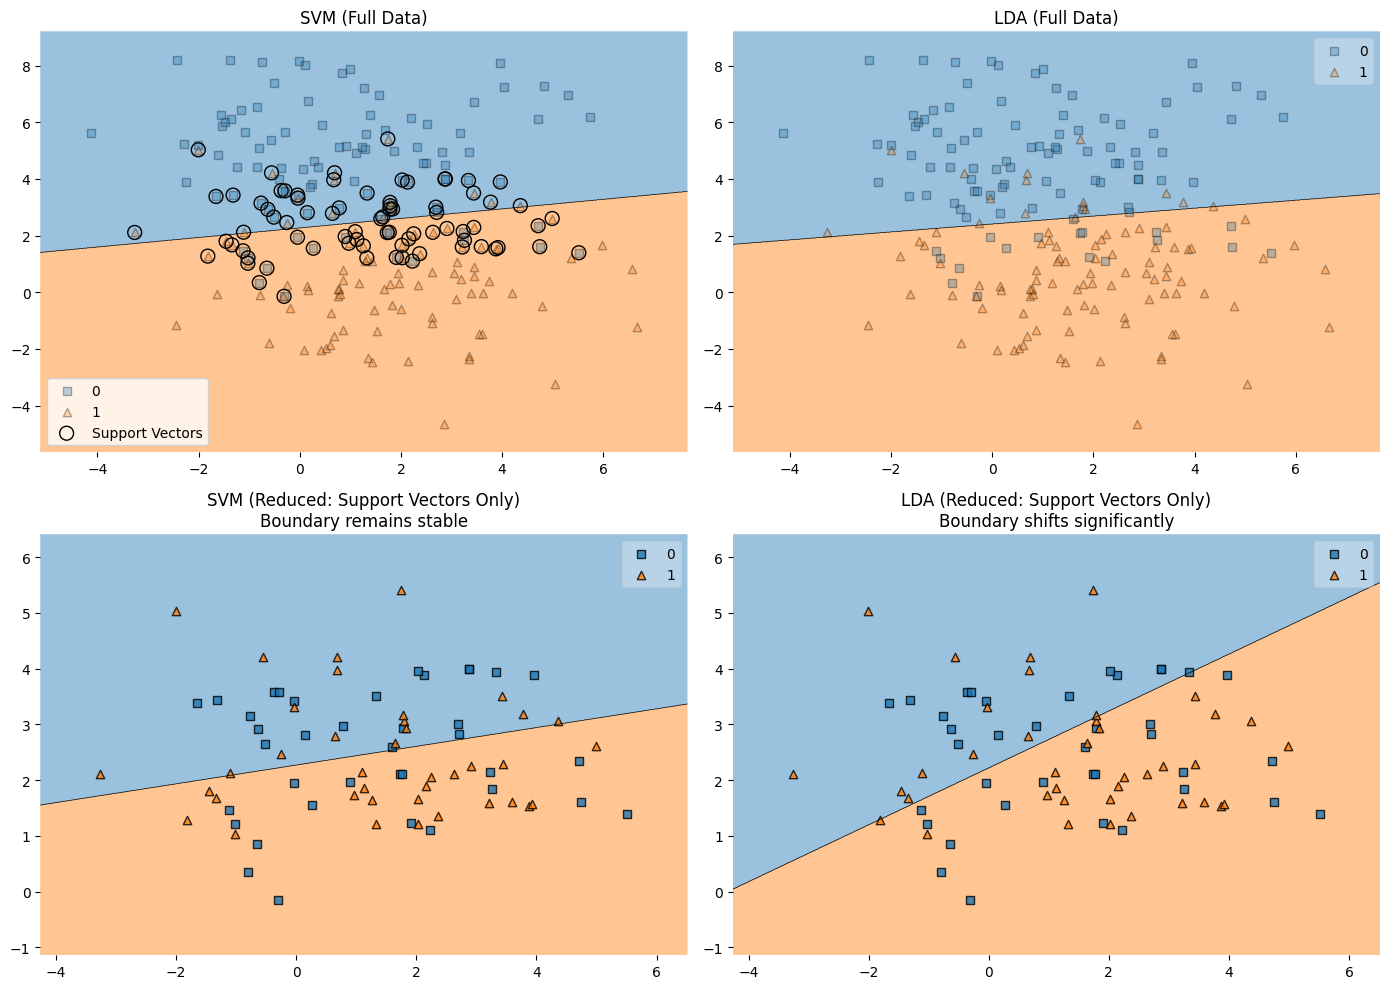

In [ ]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions

# 1. データの生成（あえて少し分散を大きくして重なりを持たせます）
X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=2.0)

# 2. 全データを使った学習
# 線形SVM (LinearSVCではなく、サポートベクターを取得しやすいSVCのlinear核を使用)
svm_full = SVC(kernel='linear', C=1.0, random_state=0)
svm_full.fit(X, y)

# 線形判別分析 (LDA)
lda_full = LinearDiscriminantAnalysis()
lda_full.fit(X, y)

# 3. データの削減（SVMのサポートベクターのみを残す）
# SVMが決定境界を決めるのに使ったデータのインデックスを取得
sv_indices = svm_full.support_
X_reduced = X[sv_indices]
y_reduced = y[sv_indices]

print(f"全データ数: {len(X)}")
print(f"削減後のデータ数(サポートベクターのみ): {len(X_reduced)}")

# 4. 削減したデータ（サポートベクターのみ）での再学習
svm_reduced = SVC(kernel='linear', C=1.0, random_state=0)
svm_reduced.fit(X_reduced, y_reduced)

lda_reduced = LinearDiscriminantAnalysis()
lda_reduced.fit(X_reduced, y_reduced)

# 5. 結果の可視化
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- 全データの場合 ---
# SVM (Full)
plot_decision_regions(X, y, clf=svm_full, ax=axes[0, 0],  scatter_kwargs={'alpha': 0.3})
axes[0, 0].set_title('SVM (Full Data)')
# サポートベクターを強調表示
axes[0, 0].scatter(X[sv_indices, 0], X[sv_indices, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
axes[0, 0].legend()

# LDA (Full)
plot_decision_regions(X, y, clf=lda_full, ax=axes[0, 1], scatter_kwargs={'alpha': 0.3})
axes[0, 1].set_title('LDA (Full Data)')

# --- 削減データ（サポートベクターのみ）の場合 ---
# SVM (Reduced)
plot_decision_regions(X_reduced, y_reduced, clf=svm_reduced, ax=axes[1, 0])
axes[1, 0].set_title('SVM (Reduced: Support Vectors Only)\nBoundary remains stable')

# LDA (Reduced)
plot_decision_regions(X_reduced, y_reduced, clf=lda_reduced, ax=axes[1, 1])
axes[1, 1].set_title('LDA (Reduced: Support Vectors Only)\nBoundary shifts significantly')

plt.tight_layout()
plt.show()

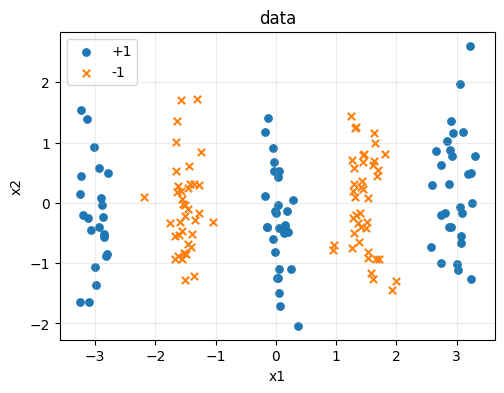

In [3]:
import numpy as np
import matplotlib.pyplot as plt

try:
    from sklearn.svm import SVC
except Exception as e:
    raise RuntimeError('scikit-learn が必要です: pip install scikit-learn') from e

rng = np.random.default_rng(0)

def mk(n=80, sx=0.18, sy=0.85):
    """縦ストライプ状の合成データを作る。+1: x≈{-3,0,3}, -1: x≈{-1.5,1.5}"""
    xp = np.array([-3.0, 0.0, 3.0])
    xn = np.array([-1.5, 1.5])
    kp = rng.choice(len(xp), size=n)
    kn = rng.choice(len(xn), size=n)
    Xp = np.c_[xp[kp] + rng.normal(0, sx, n), rng.normal(0, sy, n)]
    Xn = np.c_[xn[kn] + rng.normal(0, sx, n), rng.normal(0, sy, n)]
    X  = np.vstack([Xp, Xn])
    y  = np.hstack([np.ones(n), -np.ones(n)]).astype(int)
    return X, y

X, y = mk()

def sc(X, y, ax=None):
    if ax is None: ax = plt.gca()
    m = y==1
    ax.scatter(X[m,0], X[m,1], s=28, marker='o', label='+1')
    ax.scatter(X[~m,0], X[~m,1], s=28, marker='x', label='-1')
    ax.legend(loc='upper left')
    ax.set_xlabel('x1'); ax.set_ylabel('x2')
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, alpha=.25)

fig, ax = plt.subplots(figsize=(6,4))
sc(X,y,ax)
ax.set_title('data')
plt.show()


In [4]:
def fit_poly(X,y,p,C=1e6):
    # K(x,x') = (gamma x·x' + coef0)^p を (1 + x·x')^p に寄せる
    clf = SVC(kernel='poly', degree=p, gamma=1.0, coef0=1.0, C=C)
    clf.fit(X,y)
    acc = (clf.predict(X)==y).mean()
    return clf, acc

ps = list(range(1,9))
rs = []
for p in ps:
    clf, acc = fit_poly(X,y,p)
    rs.append((p,acc,clf.n_support_.sum()))

for p,acc,ns in rs:
    print(f"p={p:2d}  acc={acc:.3f}  #SV={ns}")

p0 = next((p for p,acc,_ in rs if acc==1.0), None)
print('min p for train=1.0 ->', p0)


p= 1  acc=0.544  #SV=145
p= 2  acc=0.744  #SV=82
p= 3  acc=0.681  #SV=84
p= 4  acc=1.000  #SV=12
p= 5  acc=1.000  #SV=16
p= 6  acc=1.000  #SV=12
p= 7  acc=1.000  #SV=16
p= 8  acc=1.000  #SV=13
min p for train=1.0 -> 4


In [5]:
def viz(clf, X, y, pad=1.2, g=380, ttl=''):
    x1,x2 = X[:,0], X[:,1]
    x1m,x1M = x1.min()-pad, x1.max()+pad
    x2m,x2M = x2.min()-pad, x2.max()+pad
    a = np.linspace(x1m,x1M,g)
    b = np.linspace(x2m,x2M,g)
    A,B = np.meshgrid(a,b)
    G = np.c_[A.ravel(), B.ravel()]
    f = clf.decision_function(G).reshape(A.shape)
    s = np.sign(f)

    fig, ax = plt.subplots(1,2, figsize=(12,4.6))

    im0 = ax[0].contourf(A,B,f, levels=60)
    ax[0].contour(A,B,f, levels=[0], linewidths=2)
    sc(X,y,ax[0])
    ax[0].set_title('decision f(x)  (contour f=0)'+('  '+ttl if ttl else ''))
    plt.colorbar(im0, ax=ax[0])

    im1 = ax[1].contourf(A,B,s, levels=[-1,0,1])
    ax[1].contour(A,B,f, levels=[0], linewidths=2)
    sc(X,y,ax[1])
    ax[1].set_title('sign(f(x))  (±1 regions)'+('  '+ttl if ttl else ''))

    plt.tight_layout()
    plt.show()

def viz_1d(clf, X, y, y0=0.0, pad=1.2, g=800, ttl=''):
    x1 = X[:,0]
    x1m,x1M = x1.min()-pad, x1.max()+pad
    t = np.linspace(x1m,x1M,g)
    G = np.c_[t, np.full_like(t, y0)]
    f = clf.decision_function(G)
    s = np.sign(f)

    fig, ax = plt.subplots(2,1, figsize=(10,5.6), sharex=True)
    ax[0].plot(t,f)
    ax[0].axhline(0)
    ax[0].set_ylabel('f(x1, y0)')
    ax[0].set_title('1D slice at y0='+str(y0)+('  '+ttl if ttl else ''))

    ax[1].plot(t,s)
    ax[1].set_yticks([-1,0,1])
    ax[1].set_xlabel('x1')
    ax[1].set_ylabel('sign(f)')
    ax[1].grid(True, alpha=.25)
    plt.tight_layout()
    plt.show()


use p= 4 acc= 1.0 SV= 12


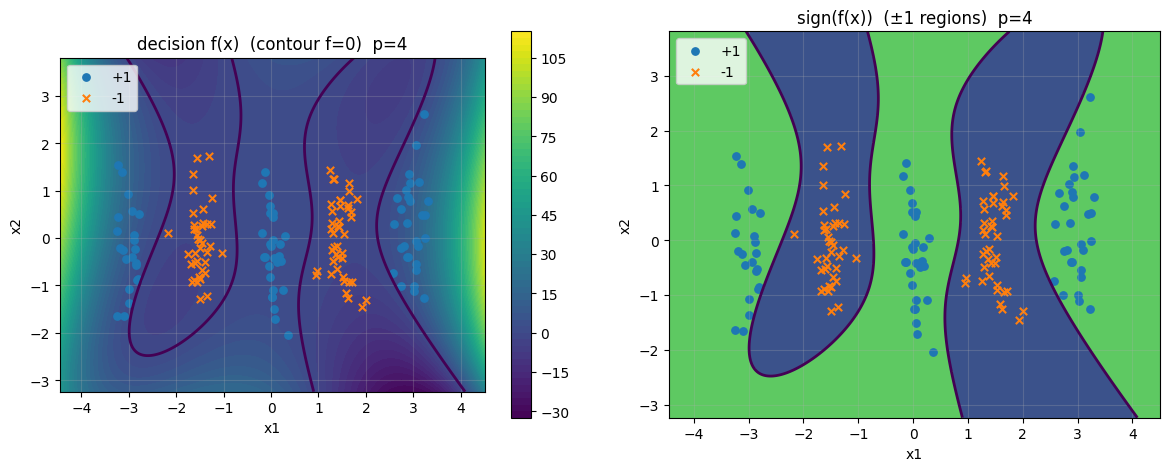

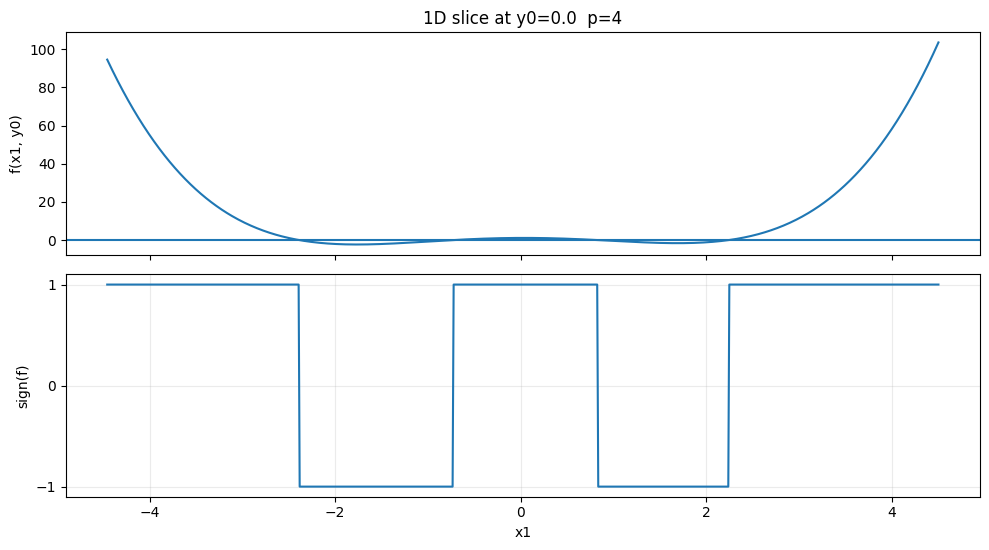

In [6]:
# 例: min p が見つかったらそれで可視化（見つからなければ p=3）
p = p0 if p0 is not None else 3
clf, acc = fit_poly(X,y,p)
print('use p=', p, 'acc=', acc, 'SV=', clf.n_support_.sum())

viz(clf, X, y, ttl=f"p={p}")
viz_1d(clf, X, y, y0=0.0, ttl=f"p={p}")


p= 1 acc= 0.54375 SV= 145


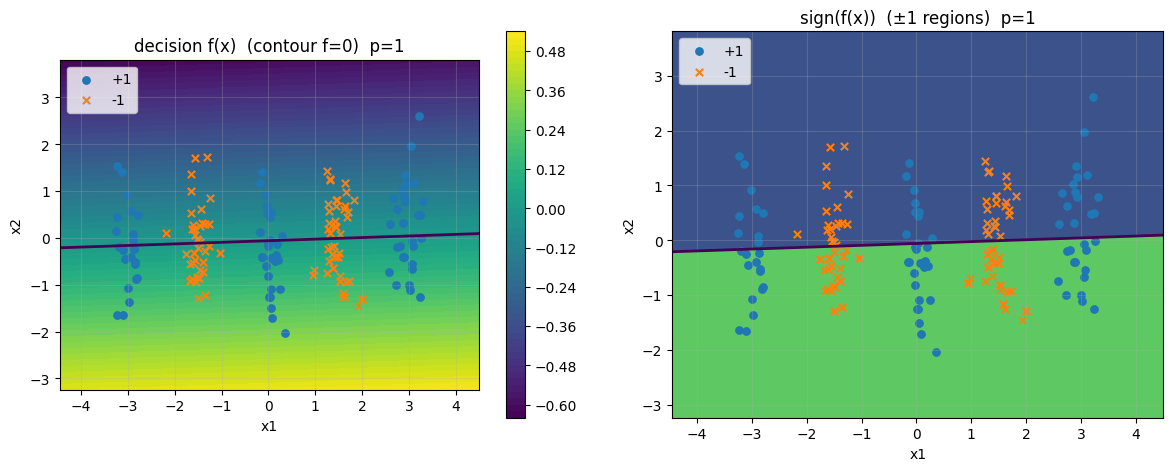

p= 2 acc= 0.74375 SV= 82


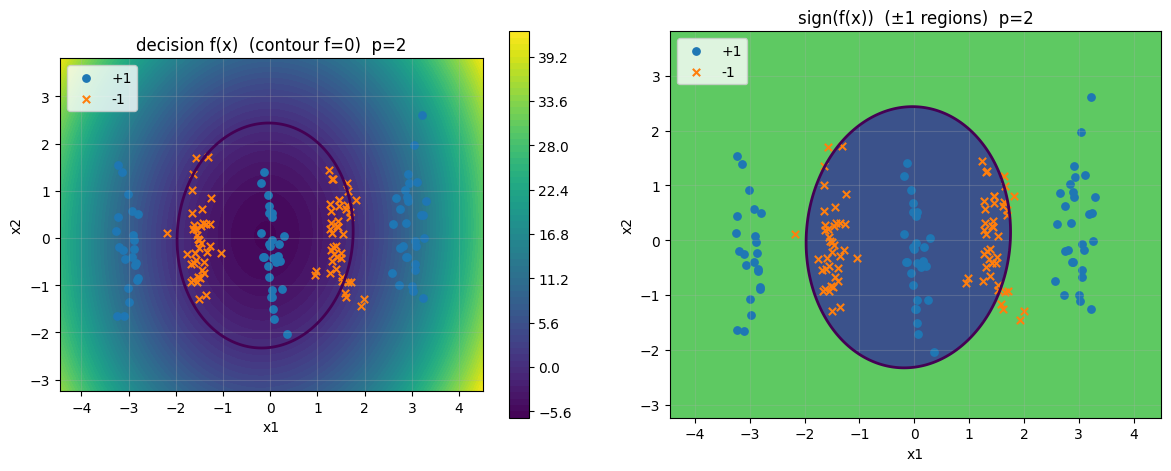

p= 3 acc= 0.68125 SV= 84


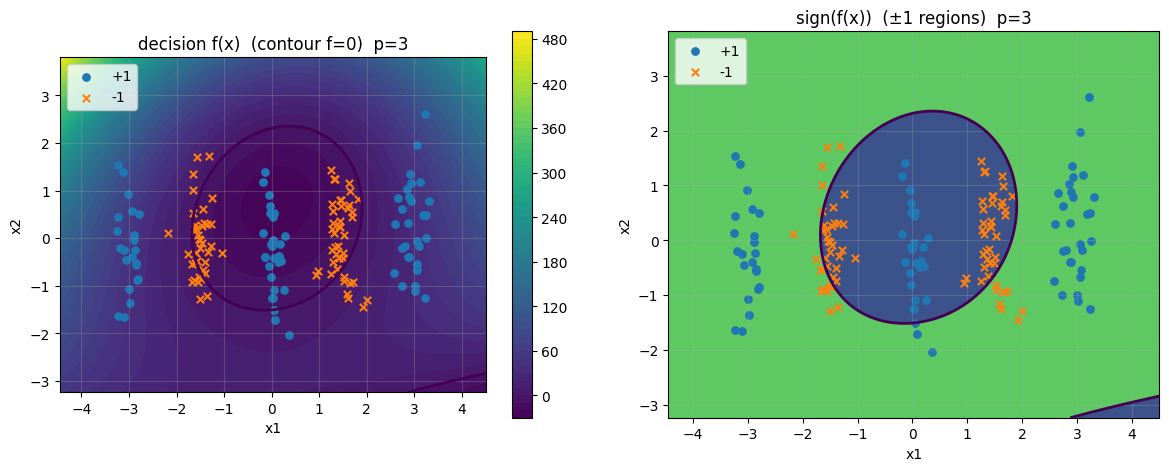

p= 4 acc= 1.0 SV= 12


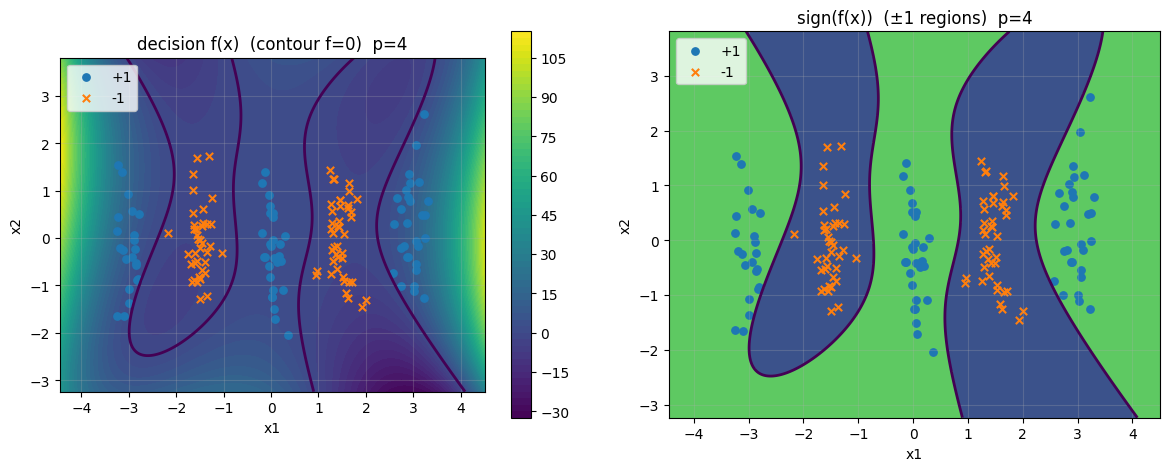

p= 5 acc= 1.0 SV= 16


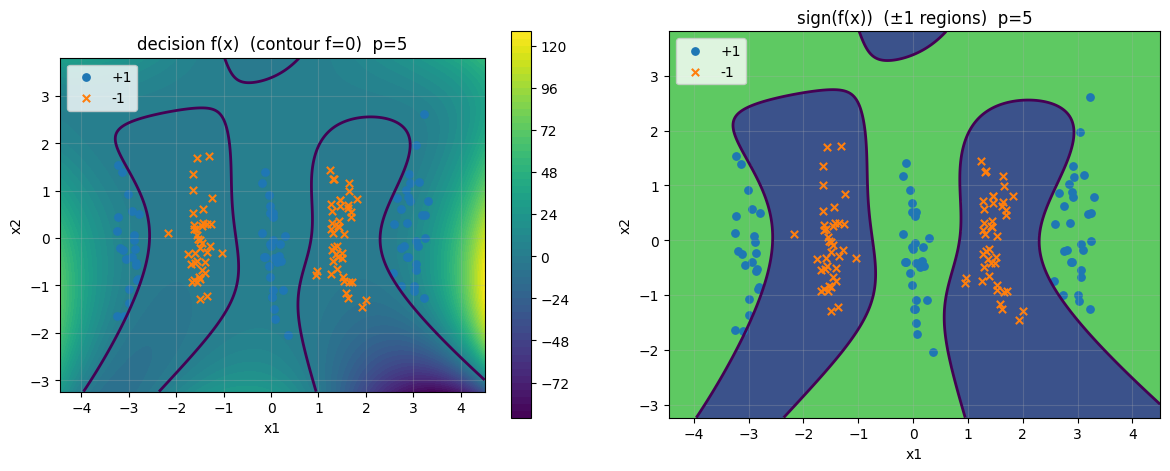

In [7]:
# 比較: p をいくつか変えて分離の変化を見る
for p in [1,2,3,4,5]:
    clf, acc = fit_poly(X,y,p)
    print('p=',p,'acc=',acc,'SV=',clf.n_support_.sum())
    viz(clf, X, y, ttl=f"p={p}")
